In [111]:
import os
from convection_diffusion import ConvectionDiffusionDataset
from FNO_2d import DomainPartitioning2d
from MatDataset import BurgersDatasetWhole
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

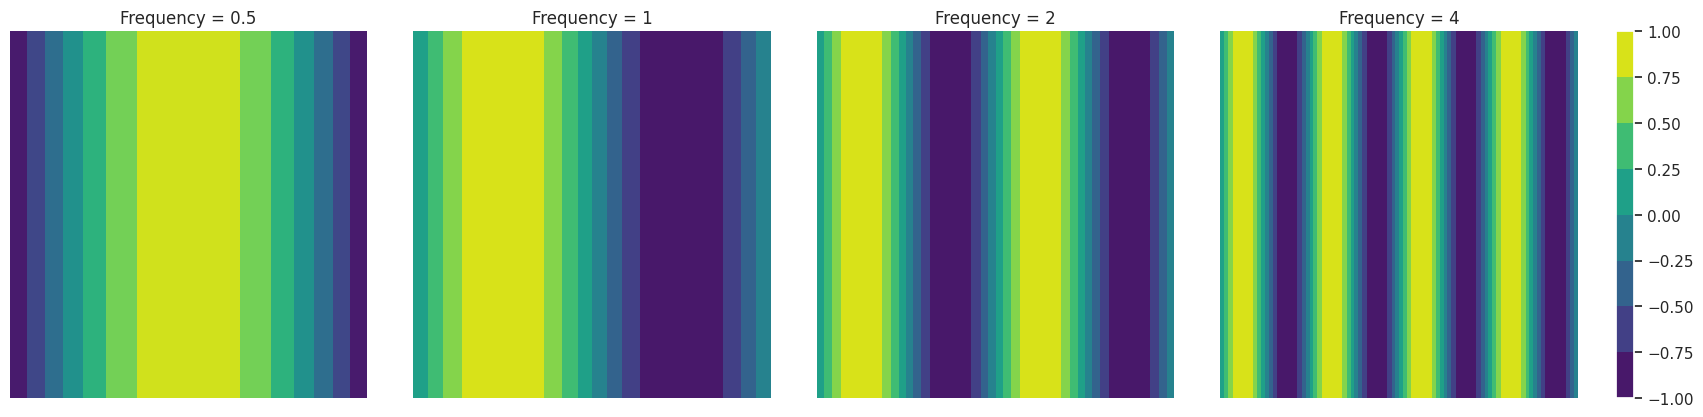

In [112]:
# plot four samples of varying frequency solution
frequency1 = 0.5
frequency2 = 1
frequency3 = 2
frequency4 = 4
domain_size = 1
resolution = 64
num_time_steps = 10
dt = 0.01
num_samples = 1
seed = 0

dataset1 = ConvectionDiffusionDataset(frequency1, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset2 = ConvectionDiffusionDataset(frequency2, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset3 = ConvectionDiffusionDataset(frequency3, domain_size, resolution, num_time_steps, dt, num_samples, seed)
dataset4 = ConvectionDiffusionDataset(frequency4, domain_size, resolution, num_time_steps, dt, num_samples, seed)

xx = np.linspace(0, 1, 64)
yy = np.linspace(0, 1, 64)
sns.set()
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# increase font size
plt.rcParams.update({'font.size': 80})

for i, dataset in enumerate([dataset1, dataset2, dataset3, dataset4]):
    axs[i].contourf(xx, yy, dataset[0][0].squeeze(), cmap='viridis')
    axs[i].set_title(f'Frequency = {dataset.frequency}')
    axs[i].axis('off')

# tight_layout() adjusts the subplots to fit into the figure area.
plt.tight_layout(pad=0.5)

# add colorbar on the right
cbar = fig.colorbar(axs[3].contourf(xx, yy, dataset[0][0].squeeze(), cmap='viridis'), ax=axs, orientation='vertical', pad=0.02)

plt.show()


(81, 81)
(81, 81)
(81, 81)
(81, 81)


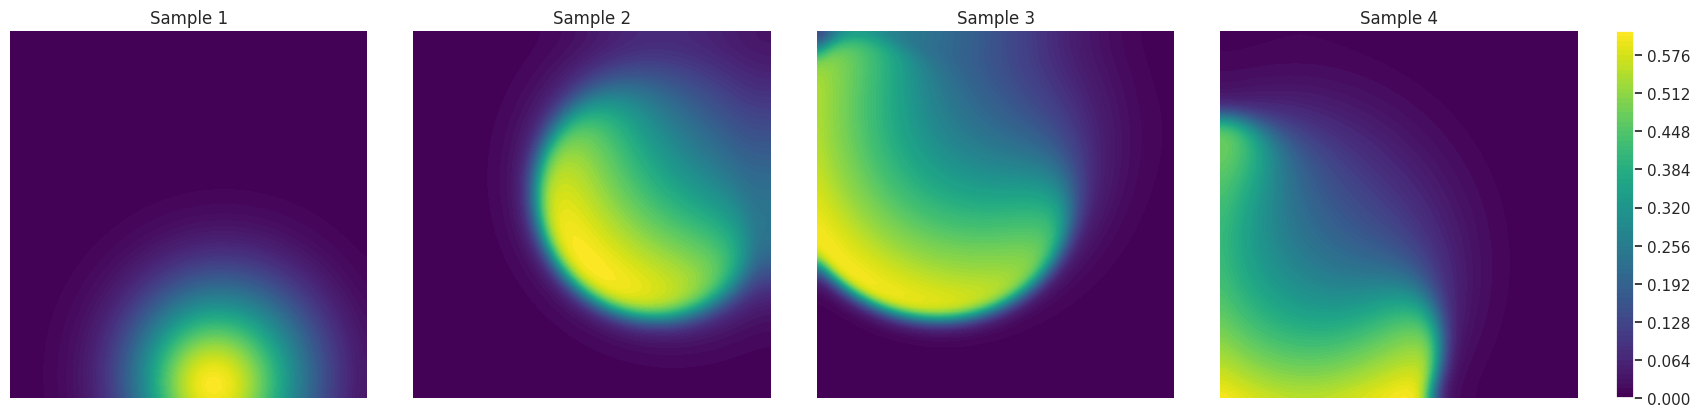

In [113]:
# plot four samples of Burgers' equation
domain_size = 1
resolution = 81

data_dir = os.path.join('data','burgers') 

dataset = BurgersDatasetWhole(root=data_dir)

sns.set()
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# increase font size
plt.rcParams.update({'font.size': 80})
xx = np.linspace(0, 1, 81)
yy = np.linspace(0, 1, 81)
for i in range(4):
    sample = dataset[i * 1000]
    print(sample[0][:, :, 0].shape)
    axs[i].contourf(xx, yy, sample[0][:, :, 0], cmap='viridis', levels=100)
    axs[i].set_title(f'Sample {i+1}')
    axs[i].axis('off')

# tight_layout() adjusts the subplots to fit into the figure area.
plt.tight_layout(pad=0.5)

# add colorbar on the right
cbar = fig.colorbar(axs[3].contourf(xx, yy, sample[0][:, :, 0], cmap='viridis', levels=100), ax=axs, orientation='vertical', pad=0.02)

In [ ]:
modes = 8
width = 20
window_size = 10

model = DomainPartitioning2d(modes, modes, width, window_size)
